# <span style='color:blue'> <center>Estadística Inferencial</center> </span>
## **Capítulo 3.** Contraste de Hipótesis
#### by **Ivan Alducin**
<p><img src="https://miro.medium.com/v2/resize:fit:1200/1*2hGMrCjLtVKtOKD_QnyuWA.png" width="1000"></p>

## Análisis de Personalidad del Cliente
<p>El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita modificar los productos de acuerdo con las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes. También ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto para cada cliente de la base de datos de la empresa, una empresa puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y luego comercializarlo sólo en ese segmento en particular.</p>

In [2]:
# Importar pandas, numpy y matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importa el marketing_campaign.csv
df = pd.read_table('marketing_campaign.csv',sep=',|\t', engine='python')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


array([[<Axes: title={'center': 'NumWebVisitsMonth'}>]], dtype=object)

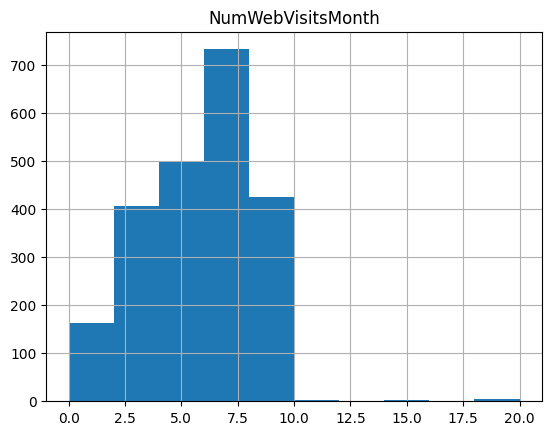

In [3]:
df.hist('NumWebVisitsMonth')

## Prueba de Hipótesis
Recordemos que para poder realizar una prueba de hipótesis necesitamos 4 pasos:
- 1. Definición de Hipótesis Nula y Alternativa
- 2. Definición de la prueba estadística
- 3. Estimación del p-value
- 4. Determinar significancia de acuerdo a los niveles de confianza

Por ejemplo, si quisiera probar si la <i>"Recencia"</i> (el número de días desde la última compra del cliente) contribuye a la predicción de la <i>"Respuesta"</i> (si el cliente aceptó la oferta en la última campaña). Entonces podemos definir las siguientes hipótesis:
- <b>Hipótesis Nula</b>: No hay diferencia en la Recencia entre los clientes que aceptan la oferta en la última campaña y los que no aceptan la oferta
- <b>Hipótesis Alternativa</b>: Los clientes que aceptan la oferta tienen una Recencia más baja en comparación con los clientes que no aceptan la oferta.

<Axes: xlabel='Recency', ylabel='Count'>

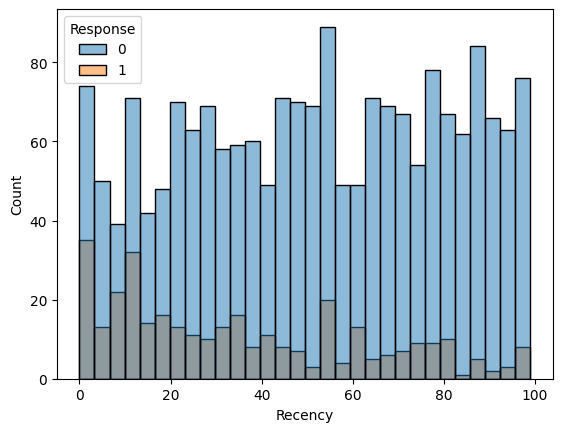

In [4]:
# Grafiquemos un comparativo entre la Recencia y la Respuesta
sns.histplot(data=df, x='Recency', hue='Response', bins=30)

## t-Test
<p>Se utiliza cuando queremos probar la relación entre una variable numérica y una variable categórica. Hay tres tipos principales de prueba T.</p>

- <u><i>t-Test de una muestra</i></u>: prueba la media de un grupo frente a un valor constante
- <u><i>t-Test de dos muestras</i></u>: prueba la diferencia de medias entre dos grupos
- <u><i>t-Test de muestras pareadas</i></u>: prueba la diferencia de medias entre dos mediciones del mismo sujeto

De acuerdo al problema que tenemos podemos definir una prueba T de dos muestras.

In [5]:
# Estas pruebas son sensibles a grandes volúmenes de datos, por eso tomemos una muestra
sampled_df = df.sample(n=100, random_state=100)

# Ahora dividamos a los clientes entre los que aceptaron la oferta y los que la rechazaron
recency_P = sampled_df[sampled_df['Response']==1]['Recency']
recency_N = sampled_df[sampled_df['Response']==0]['Recency']

In [6]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(recency_P, recency_N, alternative='less')
print('t-statistics:', t_stat, '\np-value', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
elif p_value >= 0.05:
    print('Fail to reject Null Hypothesis')

t-statistics: -2.2792332995612146 
p-value 0.012411104322490327
Reject Null Hypothesis


## p-value y Significancia
- el <b>valor p</b> (conocido también como p, p-valor, valor de p consignado, o directamente en inglés p-value) se define como la probabilidad de que un valor estadístico calculado sea posible dada una hipótesis nula cierta. En términos simples, el valor p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.

- El <b>nivel de significancia</b> comúnmente utilizado es 0.05. Dado que p-value aquí (0.012) es menor que 0.05, podemos decir que es <i>estadísticamente significativo</i> según la muestra recopilada. Es probable que una menor "Recencia" del cliente que aceptó la oferta no se produzca por casualidad. Esto indica además que la característica "Respuesta" puede ser un fuerte predictor de la variable "Recencia" Y si procedemos a entrenar un modelo de aprendizaje automático (Machine Learning) para predicir ésta variable, es probable que la carácteristica "Respuesta" tenga una gran importancia.

<p><img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*jb6Ri7urwqLiVvxd-0j-JA.png" width="500"></p>

## ANOVA
Ahora utilizaremos una prueba ANOVA para estimar si existe una diferencia entre el número de compras en línea con el número de hijos que se tengan. Empezemos por hacer una análisis visual de la información

<Axes: xlabel='Kidhome', ylabel='NumWebPurchases'>

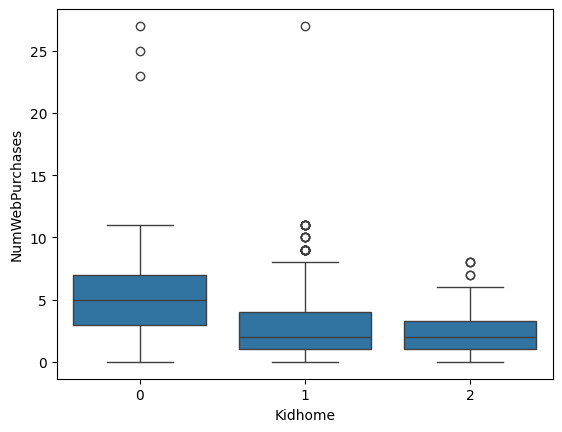

In [7]:
# Garfiquemos un boxplot con las variables de Kidhome y NumWebPurchases
sns.boxplot(y = df['NumWebPurchases'], x =df['Kidhome'])

Ahora tenemos que definir nuestras hipótesis:

- <b>Hipótesis Nula</b>: No hay diferencia entre los grupos
- <b>Hipótesis Alternativa</b>: Hay diferencia en al menos dos grupos

Como ya mencionamos las pruebas ANOVA se utilizan para examinar las relaciones de valores numéricos frente a un valor categórico con más de dos grupos. Las estadísticas de prueba de hipótesis nulas en la prueba ANOVA también siguen una distribución definida por grados de libertad, que es la distribución f. Los grados de libertad se calculan por el número de muestras totales (n) y el número de grupos (k).

In [8]:
# Grupos de acuerdo al número de hijos
kidhome_0 = sampled_df[sampled_df['Kidhome']==0]['NumWebPurchases']
kidhome_1 = sampled_df[sampled_df['Kidhome']==1]['NumWebPurchases']
kidhome_2 = sampled_df[sampled_df['Kidhome']==2]['NumWebPurchases']

In [9]:
# Prueba estadística
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(kidhome_0, kidhome_1, kidhome_2)
print('t-statistics:', t_stat, '\np-value', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
elif p_value >= 0.05:
    print('Fail to reject Null Hypothesis')

t-statistics: -2.2792332995612146 
p-value 0.00039808004666969506
Reject Null Hypothesis
